In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])
df_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [4]:
job_title = df_US['job_title_short'].value_counts().index[:6].tolist()


In [5]:
job_title

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [6]:
df_US_Top6 = df_US[df_US['job_title_short'].isin(job_title)]

In [12]:
job_order = df_US_Top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

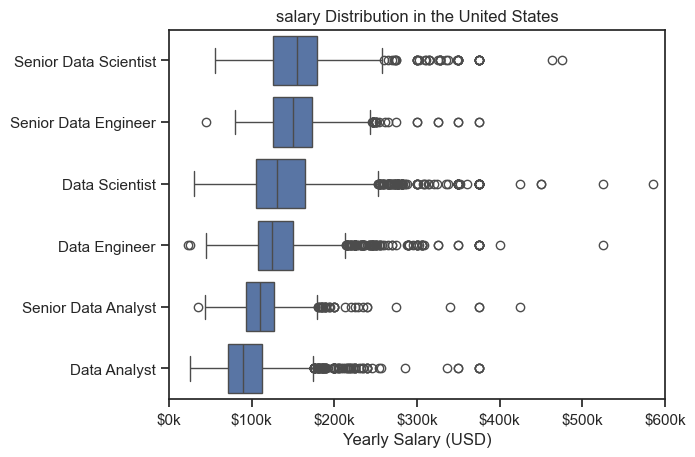

In [13]:
sns.boxplot(data=df_US_Top6 ,x='salary_year_avg',y='job_title_short',order=job_order)
sns.set_theme(style='ticks')

plt.title('salary Distribution in the United States')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000)
ticks_x = plt.FuncFormatter (lambda y , pos:f'${int(y/1000)}k')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary vs Skill for Data Analysts


In [14]:
import matplotlib.ticker as ticker

In [15]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset= 'salary_year_avg')

df_DA_US = df_DA_US.explode('job_skills')

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

df_DA_US_TopDemand =df_DA_US_group.sort_values(by=['count'],ascending=False).head(10).sort_values(by=['median'],ascending=False)

df_DA_US_TopPay =df_DA_US_group.sort_values(by=['median'],ascending=False).head(10)

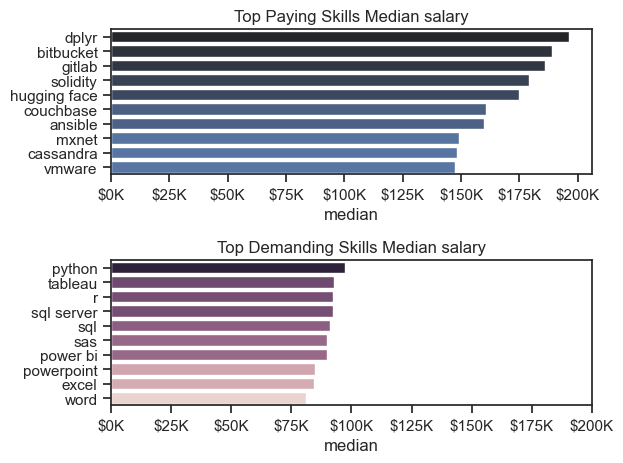

In [16]:
fig , ax = plt.subplots(2,1)
sns.barplot(x='median',y=df_DA_US_TopPay.index,data=df_DA_US_TopPay,ax=ax[0],hue='median',palette='dark:b_r')
# df_DA_US_TopPay.plot(kind='barh',y='median' ,ax=ax[0],legend=False)
# ax[0].invert_yaxis()
ax[0].legend().remove()
ax[0].set_title('Top Paying Skills Median salary')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[0].set_ylabel('')


sns.barplot(x='median',y=df_DA_US_TopDemand.index,data=df_DA_US_TopDemand,ax=ax[1],hue='median')
# df_DA_US_TopDemand.plot(kind='barh',y='median' ,ax=ax[1],legend=False)
# ax[1].invert_yaxis()
ax[1].legend().remove()
ax[1].set_title('Top Demanding Skills Median salary')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x,_ : f'${int(x/1000)}K'))
ax[1].set_ylabel('')


plt.xlim(0,200000)
plt.tight_layout()
plt.show()